### 1.读取运营商和通讯录数据 2.处理异常值 3观察数据分布

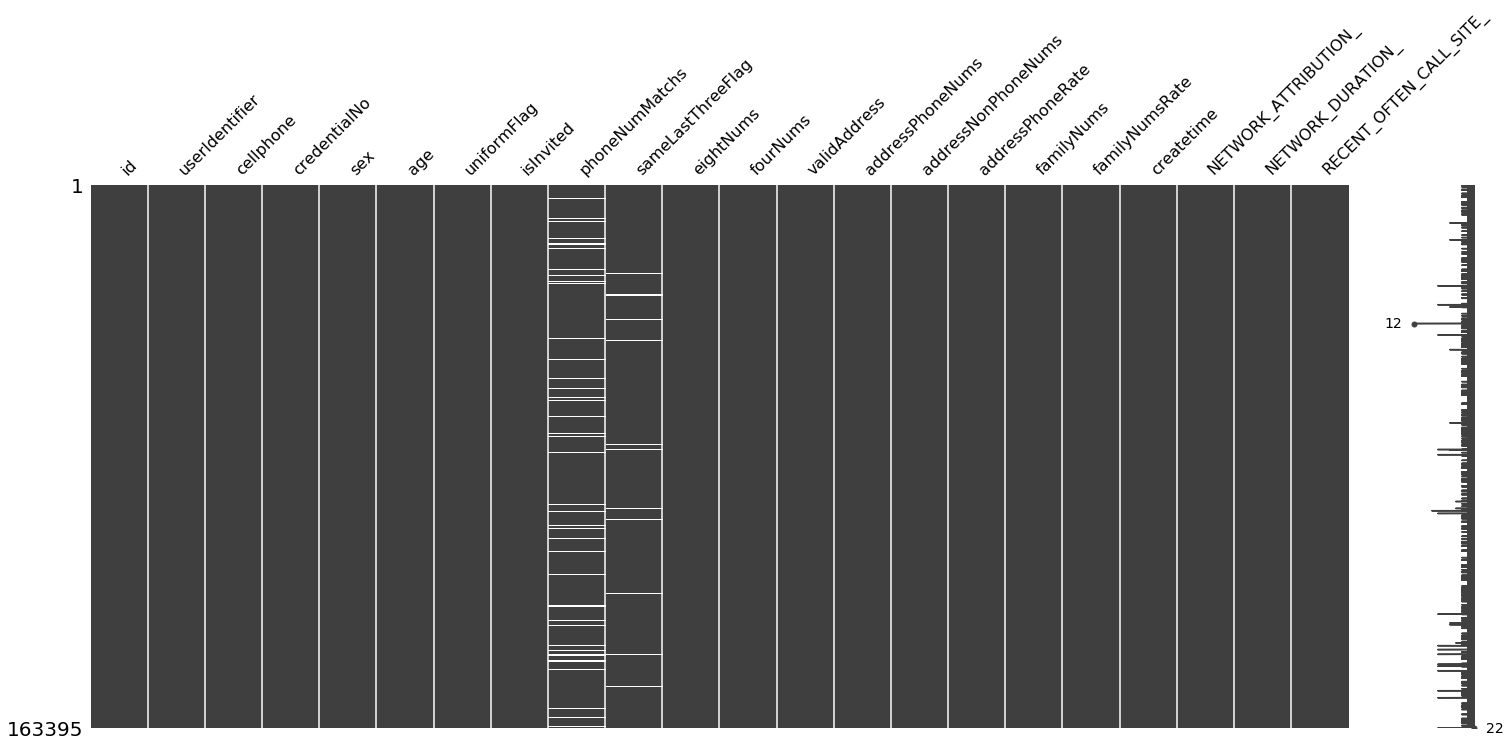

In [1]:
import pandas as pd
import missingno as missingno
import matplotlib.pyplot as plt
operator_data=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/data1/Data/operator_data.csv",sep=",",encoding="gbk")
extention=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/data1/Data/user_extention.csv",sep=",",encoding="gbk")
extention["uniformFlag"]=extention["uniformFlag"].fillna(0)
extention["isInvited"]=extention["isInvited"].fillna(0)
extention=extention.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,25,26,27,28,29,30,31,33,34,35]]
operator_data.count()
missingno.matrix(extention)
plt.show()

### 变量衍生 生成主要时间点和平均话费

In [2]:
#生成衍生变量first_leadhour为生成借款时间点；avg_zhujiao_money为话费/主叫时长
from datetime import datetime
operator_data["first_leadhour"]=operator_data["first_leadtime"].map(lambda x:datetime.strptime(x,"%Y/%m/%d %H:%M").hour)
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"][operator_data["AVG(DIALING)"]!=0]=operator_data["avg(TELEPHONE_CHARGE_)"]/operator_data["AVG(DIALING)"]

/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 两表合并（merge的讲解http://blog.csdn.net/casey_cai/article/details/56834649）

In [3]:
# python中copy为浅拷贝
operator_data["y"]=1
operator_data["y"][operator_data["yuqi"]<15]=0
first_data = pd.merge(extention,operator_data,left_on='userIdentifier',right_on='USER_IDENTIFIER_').drop('userIdentifier',axis=1)
first_data = first_data.drop(['yuqi','first_leadtime','id','cellphone','createtime'],axis=1)
# 这是关于pandas的isnull,isnotnull,dropna,fillna的讲解(http://blog.csdn.net/u010159842/article/details/53673572)
first_data["province_network"] = first_data["NETWORK_ATTRIBUTION_"][pd.notnull(first_data["NETWORK_ATTRIBUTION_"])].map(lambda x:x.split('.')[0])
first_data["province_rencent"] = first_data["RECENT_OFTEN_CALL_SITE_"][pd.notnull(first_data["RECENT_OFTEN_CALL_SITE_"])].map(lambda x:x.split('.')[0])
first_data1 = first_data.drop(pd.isnull(first_data["NETWORK_ATTRIBUTION_"]),axis=0).copy()
first_data1 = first_data1.drop(["NETWORK_ATTRIBUTION_","RECENT_OFTEN_CALL_SITE_"],axis=1)
first_data1

/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,sameLastThreeFlag,eightNums,fourNums,validAddress,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1.0,1,0,49.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,1.0,0,1,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1.0,1,1,138.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1.0,1,0,160.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1.0,1,0,909.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,1.0,0,1,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,1.0,0,2,145.0,...,261.0,208.509154,116.123822,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,1.0,2,0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,1.0,2,2,75.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,1.0,2,1,129.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


### 少数缺失值处理，采用均值插补或者字符串类型采用众数替代

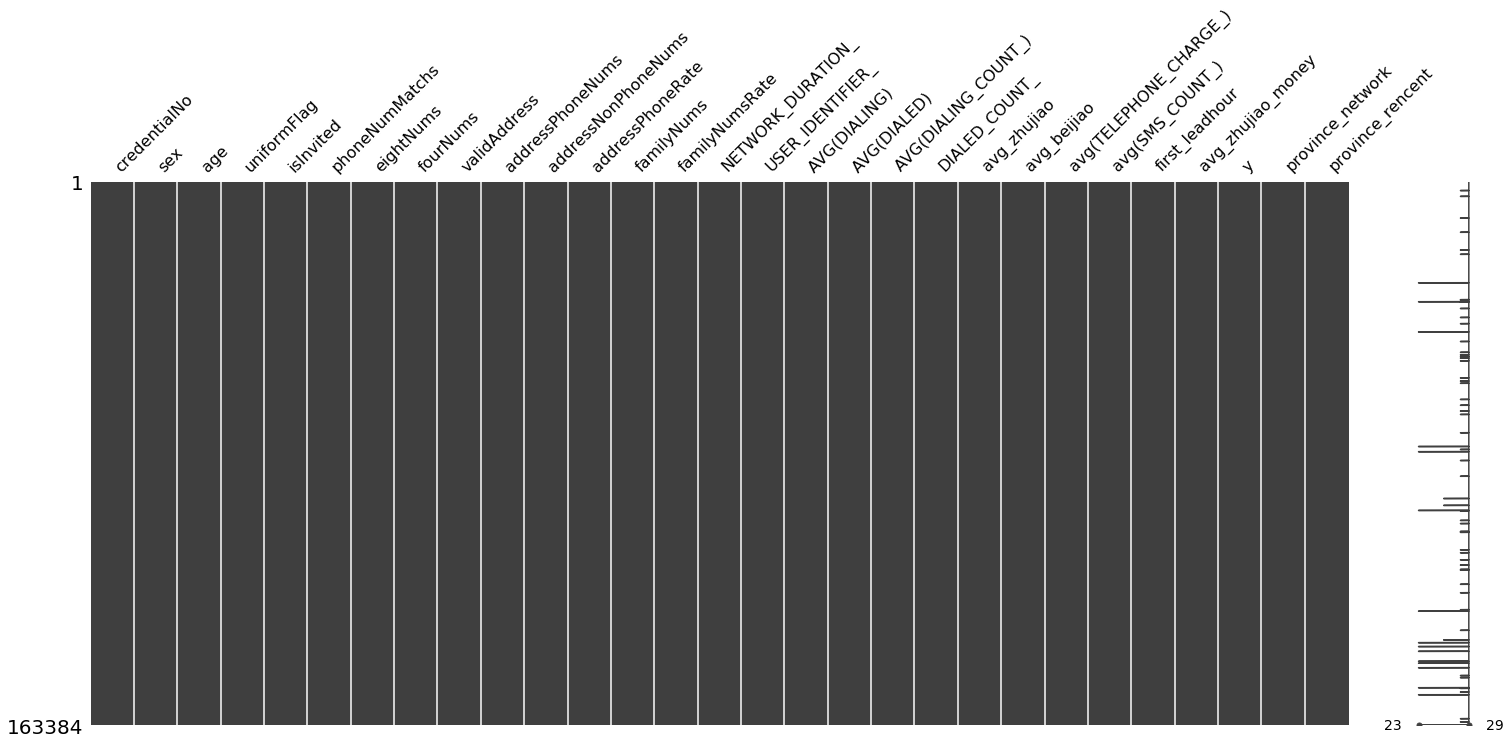

In [4]:
## 下面对部分缺失值处理，采用均值插补或者众数
#可以看一下这个imputer中的均值插补，怎么算的，注意这边的axis=0标示列而drop中的axis=0标示行
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan , strategy='mean', axis=0)
meanMatch = imp.fit(np.array(first_data1["phoneNumMatchs"]).reshape(-1,1))
# imp.statistics_[0]
# np.mean(first_data1["phoneNumMatchs"])
first_data1["phoneNumMatchs"]=first_data1["phoneNumMatchs"].fillna(imp.statistics_[0])
first_data2 = first_data1.drop(["sameLastThreeFlag"],axis=1).copy()
missingno.matrix(first_data2)
plt.show() 

In [5]:
first_data2["avg(TELEPHONE_CHARGE_)"][first_data2["avg(TELEPHONE_CHARGE_)"]<0]=0
first_data2["avg_zhujiao_money"][first_data2["avg_zhujiao_money"]<0]=0
#删除其余七十条数据
first_data2 =first_data2.dropna(axis=0)

/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 以上部分是对运营商和通讯录的数据处理，下面一部分是对大数据清洗的数据进行合并整合

In [6]:
bigData24WorkDayhour=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/testingData/user_3months_calls_statistics .csv",sep=",",encoding="UTF-8")
bigData24HoliDayhour=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/testingData/holiday_day_24_hour_call_time_distribution.csv",sep=",",encoding="UTF-8")
bigData2Mounth=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/testingData/user_2months_calls_statistics.csv",sep=",",encoding="UTF-8")
bigData3Mounth=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/testingData/user_3months_calls_statistics .csv",sep=",",encoding="UTF-8")

In [7]:
# missingno.matrix(bigData24WorkDayhour)
# missingno.matrix(bigData24HoliDayhour)
# missingno.matrix(bigData2Mounth)
# missingno.matrix(bigData3Mounth)
plt.show()

### 合并四张大数据表格

In [8]:
# bigData24WorkDayhour
# bigData24HoliDayhour
# bigData2Mounth
# bigData3Mounth
merge12 = pd.merge(bigData24WorkDayhour,  bigData24HoliDayhour,  on="identity_code")
merge123 = pd.merge(merge12,  bigData2Mounth,  on="identity_code")
mergeallBigData = pd.merge(merge123,  bigData3Mounth,  on="identity_code")


In [9]:
#处理没用的特征,中文drop需要加u
import pandas as pd
bigFinallyData =mergeallBigData.drop([u'记录数_x',u'记录数_y',u'记录数','oem_x','oem_y','plat_y','plat_x','user_phone','user_phone_x','month_x','month_y','month','user_phone_y','authdate_x'],axis=1)
# bigFinallyData1 = bigFinallyData.drop( u'name')

### 变量衍生

In [10]:
bigFinallyData
bigFinallyData["occur_time_x"]=bigFinallyData["occur_time_x"].map(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)
bigFinallyData["occur_time_y"]=bigFinallyData["occur_time_y"].map(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)
bigFinallyData["occur_time"]=bigFinallyData["occur_time"].map(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)
bigFinallyData["authdate_y"]=bigFinallyData["authdate_y"].map(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)
bigFinallyData["authdate"]=bigFinallyData["authdate"].map(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)


/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [11]:
bigFinallyData

,identity_code,occur_time_x,user_3months_call_count_x,user_3months_call_time_x,user_3months_called_count_x,user_3months_called_time_x,user_3months_interflow_number_x,user_3months_nightphone_count_x,user_3months_phone_count_x,user_3months_phone_time_x,...,user_3months_call_time_y,user_3months_called_count_y,user_3months_called_time_y,user_3months_interflow_number_y,user_3months_nightphone_count_y,user_3months_phone_count_y,user_3months_phone_time_y,user_3months_phonenumber_number_y,user_3months_restphone_count_y,user_3months_workphone_count_y
0,440508199608034956,17,377,972,375,412,52,127,752,1384,...,972,375,412,52,127,752,1384,225,497,255
1,440582197906060655,17,280,224,365,237,38,20,645,461,...,224,365,237,38,20,645,461,109,362,283
2,440582199010023658,17,542,788,390,479,45,36,932,1267,...,788,390,479,45,36,932,1267,277,545,387
3,440582199708233737,17,809,253,406,201,23,111,1215,453,...,253,406,201,23,111,1215,453,90,1031,184
4,44068119880626083X,17,690,568,868,637,40,15,1558,1205,...,568,868,637,40,15,1558,1205,427,881,678
5,440782198109155059,17,506,777,861,1035,31,6,1367,1812,...,777,861,1035,31,6,1367,1812,186,593,774
6,440783198105085619,17,421,426,925,899,54,7,1346,1324,...,426,925,899,54,7,1346,1324,261,721,625
7,440801198901082348,17,1228,1344,628,642,48,1,1856,1985,...,1344,628,642,48,1,1856,1985,146,956,900
8,440811199504250341,17,1012,1104,890,978,63,32,1902,2082,...,1104,890,978,63,32,1902,2082,190,1198,704
9,440825198708043954,17,278,362,194,253,33,50,472,614,...,362,194,253,33,50,472,614,168,404,68


### 合并大数据表格、运营商、通讯录得到最终的数据汇总

In [12]:
finData = pd.merge(bigFinallyData,  first_data2,  left_on="identity_code",right_on="credentialNo")

#### 除去ID类特征

In [13]:
finalData = finData.drop(["identity_code","credentialNo","USER_IDENTIFIER_"],axis=1)

In [14]:
finalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14020 entries, 0 to 14019
Data columns (total 78 columns):
occur_time_x                         14020 non-null int64
user_3months_call_count_x            14020 non-null int64
user_3months_call_time_x             14020 non-null int64
user_3months_called_count_x          14020 non-null int64
user_3months_called_time_x           14020 non-null int64
user_3months_interflow_number_x      14020 non-null int64
user_3months_nightphone_count_x      14020 non-null int64
user_3months_phone_count_x           14020 non-null int64
user_3months_phone_time_x            14020 non-null int64
user_3months_phonenumber_number_x    14020 non-null int64
user_3months_restphone_count_x       14020 non-null int64
user_3months_workphone_count_x       14020 non-null int64
hh01                                 14020 non-null int64
hh1011                               14020 non-null int64
hh1213                               14020 non-null int64
hh1415               

#### 将object类型编码
sklearn.processing.labelEncoder(),标准化标签，对省份字符串进行特征标准化。

In [15]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
finalDataTemp = finalData
finalData["province_network"]=class_le.fit_transform(finalDataTemp["province_network"].values)
finalData["province_rencent"]=class_le.fit_transform(finalDataTemp["province_rencent"].values)

### 查看样本特征分布，分析数据

In [16]:
finalData.describe()

,occur_time_x,user_3months_call_count_x,user_3months_call_time_x,user_3months_called_count_x,user_3months_called_time_x,user_3months_interflow_number_x,user_3months_nightphone_count_x,user_3months_phone_count_x,user_3months_phone_time_x,user_3months_phonenumber_number_x,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
count,14020.0,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,...,14020.000000,14020.000000,14020.000000,1.402000e+04,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000
mean,17.0,506.226605,743.267546,588.544793,739.348573,47.039444,30.944009,1103.545221,1487.093652,235.529672,...,192.977175,91.972563,80.357093,1.857025e+04,225.578747,13.384379,2.017835,0.095792,15.454850,16.120685
std,0.0,414.700000,668.653308,412.810973,574.318674,33.459830,59.755149,790.641494,1166.455821,141.119184,...,147.429290,46.008329,35.394421,2.390026e+04,460.264203,4.476772,3.264512,0.294316,7.723272,7.522711
min,17.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,51.000000,9.000000,...,0.000000,11.889947,11.454245,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.0,226.000000,305.000000,310.000000,364.000000,25.000000,4.000000,566.000000,713.000000,144.000000,...,96.000000,63.632007,58.842209,1.081619e+04,14.714300,10.000000,0.831156,0.000000,10.000000,12.000000
50%,17.0,394.000000,553.000000,491.000000,587.000000,39.000000,12.000000,911.000000,1173.000000,206.000000,...,155.000000,81.011656,72.438385,1.666196e+04,41.625000,13.000000,1.374348,0.000000,15.000000,15.000000
75%,17.0,665.000000,958.000000,749.250000,947.000000,60.000000,34.000000,1416.000000,1896.250000,293.000000,...,246.000000,106.217973,92.679803,2.362266e+04,202.600000,16.000000,2.336961,0.000000,21.000000,20.000000
max,17.0,5004.000000,9149.000000,6192.000000,8748.000000,498.000000,1989.000000,10526.000000,15287.000000,2502.000000,...,2239.000000,649.210000,619.185695,2.512969e+06,9448.875000,23.000000,265.708251,1.000000,31.000000,34.000000


### 删除无意义数据

In [17]:
finalData = finalData.drop(["occur_time","occur_time_x","occur_time_y"],axis=1)

### 制作评分卡，需要对特征数据进行分组，分组规划观察其IV值和woe值，寻找合适的分组可以增强模型的判断力

1.寻找合适的分组.首先定义几个函数后面使用。

In [18]:
class getIVandKS(object):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    def __init__(self):
        self.result = []
        self.IV = []
        self.KS = []
        self.KSPy1 =[]
        self.KSPy0 =[]
    def fit(self,x,y):
        x = x.dropna()
        #分频统计，表格中显示同事满足X的值和Y的值的个数。     
        tabel = pd.crosstab(x,y)
        py1 = []
        py0 = []
        for i in list(range(len(tabel))):
            #这边的[]相加只是县党羽append，这边分母是什么影响不大，因为woe最后除了抵消了。py1,py0是指好用户坏用户在这个分组里面占总体的比例。      
            py1 = py1+[tabel.iloc[i,1]*1.0/sum(tabel[1])]
            py0 = py0+[tabel.iloc[i,0]*1.0/sum(tabel[0])]
        py1 = pd.Series(py1,index = tabel.index)
        py0 = pd.Series(py0,index = tabel.index)
        #如果好用户和坏用户差不多比例则他们的比值woe应该接近0      
        woe = np.log(py1/py0)
        IV = (py1-py0)*woe
        result = pd.concat([tabel,py1,py0,woe,IV],axis=1)
        result.columns = ["0","1","py1","py0","woe","IV"]
        self.result = result
        self.IV = sum(result["IV"])
        
    def getKS(self):
        tableKS = self.result
        cum_py1 = pd.Series(np.zeros(len(tableKS)))
        cum_py0 = pd.Series(np.zeros(len(tableKS)))
        for i in list(range(len(tableKS))):
            if i==0:
                cum_py1[i] = tableKS['py1'][[i]]
                cum_py0[i] = tableKS['py0'][[i]]
            else:
                cum_py1[i] = cum_py1[i-1] + tableKS['py1'][[i]]
                cum_py0[i] = cum_py0[i-1] + tableKS['py0'][[i]]
        ks = pd.Series(np.abs(cum_py1-cum_py1))
        ks.index = tableKS.index
        cum_py1.index =tableKS.index
        cum_py0.index =tableKS.index
        self.KS = pd.concat([tableKS,ks,cum_py1,cum_py0],axis=1)
        self.KS.columns=list(tableKS.columns)+["KS","cum_py1","cum_py0"]
        self.KSPy1 =cum_py1
        self.KSPy0 =cum_py0
        print(self.KS)
    
    def plot_woe(self):
        tabel = self.result
        n=len(tabel.index)
        plt.bar(list(range(n)),np.array(tabel['woe']),width=0.8,facecolor="#9999ff",edgecolor="white")
        plt.xticks(list(range(n)),tabel.index,rotation=90)

### 寻找IV值更高的对应的每个特征值的更好的分组

In [19]:
######cut 有个属性duplicates ='drop' 就是有不平衡情况 删除这个
IV=[]
IV_cutN=[]
for i in finalData.drop(['y'],axis=1).columns:
    IV_i=[]
    IV_ij =1
    print("0000000000"+i)
    maxI =0
    #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],尝试分组
    for j in range(1,12):
        #X就是把每组的数据，变成了属于所在的分组的数据。例如350变成了(446.0, 683.0],其中duplicates ='drop'，如果分组无法刚好划分时候的处理。
        X = pd.qcut(finalData[i],j,duplicates ='drop')
        fun =getIVandKS()
        #rangX和y调用fun的fit函数
        fun.fit(X,finalData['y'])
        if(maxI<fun.IV):
            maxI = fun.IV
            IV_ij = j
        print(fun.IV)
        IV_i += [fun.IV]
    IV_cutN += [IV_ij]
    IV += [max(IV_i)]
print(IV)
print(IV_cutN)

0000000000user_3months_call_count_x
0.0
0.00461249970835
0.00266781227052
0.00611985128085
0.00567426620785
0.00689339099374
0.00508049792422
0.00774036992438
0.00549706392831
0.00837074171047
0.00853816902455
0000000000user_3months_call_time_x
0.0
6.58017305543e-05
0.00379472033995
0.00553375248614
0.00289362708013
0.00674710792045
0.00746448664294
0.0081714509867
0.0139618732148
0.0144636459525
0.0153836811905
0000000000user_3months_called_count_x
0.0
0.0252180960904
0.0373658543863
0.0337330223122
0.0333504255017
0.0390960952362
0.0382021955362
0.038397215703
0.0391598935825
0.0386535236196
0.0527198586981
0000000000user_3months_called_time_x
0.0
0.00359801438629
0.0043240050297
0.00426145282259
0.0055611598261
0.00495487444936
0.00728157041416
0.00665264207596
0.00630342796535
0.00867327050606
0.00900631887372
0000000000user_3months_interflow_number_x
0.0
0.00455029644427
0.00369377363076
0.00646550029193
0.00510720492451
0.00508952551228
0.00762767474813
0.0112821541525
0.00665565

0.118560446997
0.117472187931
0.117016600298
0.12275853448
0.127901251335
0.127151615459
0.128799668721
0.137525064098
0000000000user_3months_phone_count_y
0.0
0.0145924274321
0.0159508590926
0.0200550934664
0.0198565170587
0.0191267044977
0.0198022131573
0.0228850877927
0.0204023522597
0.0224548927791
0.0275123476297
0000000000user_3months_phone_time_y
0.0
0.00314208030987
0.00474155734519
0.00421046617819
0.00393752045157
0.00488914882582
0.00861528949709
0.0052963891495
0.00802097004856
0.0119265880637
0.00808888527242
0000000000user_3months_phonenumber_number_y
0.0
0.101870109147
0.118168689401
0.120323508264
0.141731357872
0.125068531903
0.142190599303
0.135573033878
0.142165400076
0.142618789943
0.139691476038
0000000000user_3months_restphone_count_y
0.0
0.00101152343581
0.00553068754091
0.00388216045524
0.00843590740797
0.0100675024494
0.0109570861636
0.00973865883432
0.00936252600157
0.010732581594
0.0185013207044
0000000000user_3months_workphone_count_y
0.0
0.0381204282429
0.0

In [20]:
params = finalData.drop(['y'],axis=1).columns
woeTable = pd.concat([pd.Series(IV),pd.Series(IV_cutN),pd.Series(params)],axis=1)
woeDataFrame = pd.DataFrame(woeTable)
woeDataFrame.columns=([ 'IV','IV_cutN','params'])
woeDataFrameSorted = woeDataFrame.sort_index(by='IV',ascending=False)
woeDataFrameSorted

/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """


,IV,IV_cutN,params
25,0.162689,11,user_2months_phonenumber_number
8,0.142619,10,user_3months_phonenumber_number_x
45,0.142619,10,user_3months_phonenumber_number_y
42,0.137525,11,user_3months_nightphone_count_y
5,0.137525,11,user_3months_nightphone_count_x
33,0.124575,9,user_2months_nightphone_count
19,0.073650,8,hh23
61,0.070180,11,NETWORK_DURATION_
12,0.067621,10,hh1011
34,0.065521,11,user_2months_workphone_count


### 对后面5个参数再次分析

### 1familyNumsRate,familyNums大部分数据均为0不具有参考性,分部不适合做分析。考虑其他三个特征isInvited/uniformFlag/sex。isInvited/uniformFlag/sex这三个数没必要分组因为，本事就是两组。

### 选择IV值大于0.02的前三十个特征做评分卡

### 下面来考虑对这30个特征每个特征的IV最大化时候的woe分组样本的信息量的变化 如果变化呈现反复波动 则分组不合理

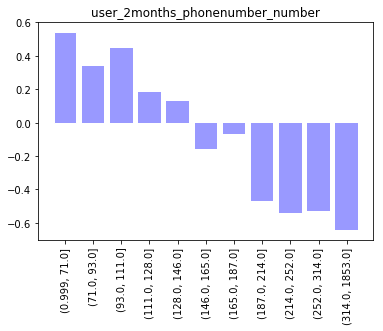

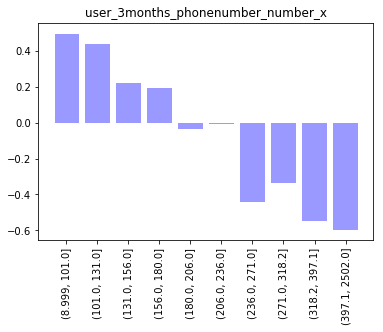

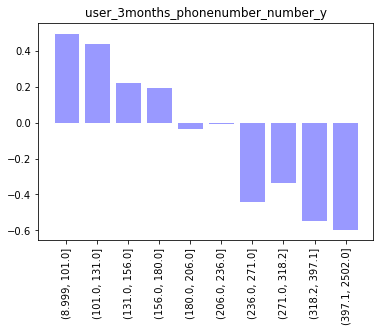

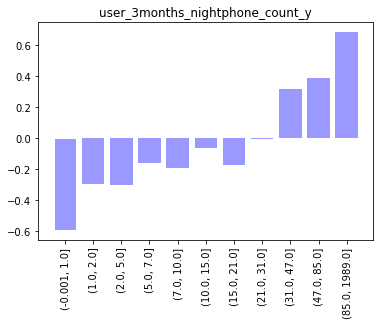

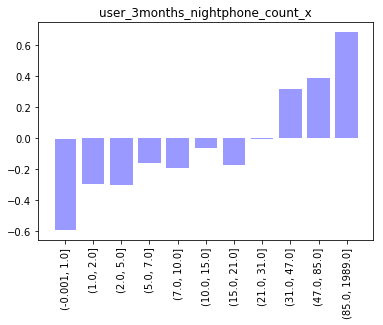

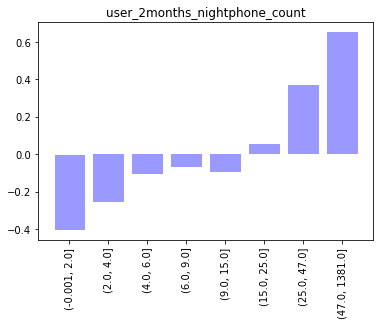

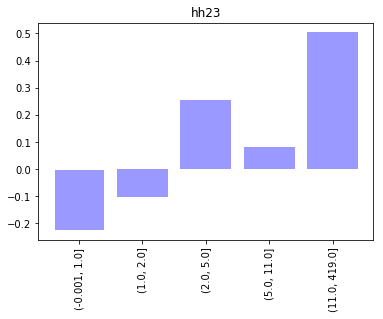

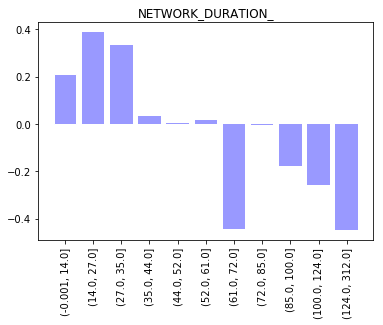

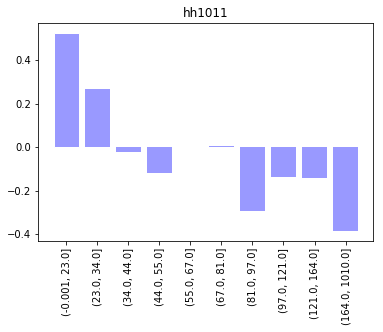

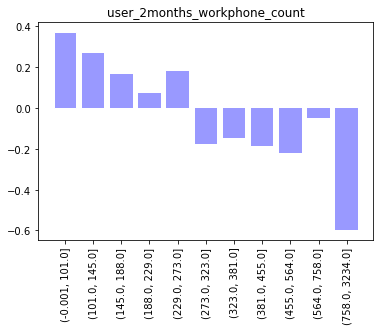

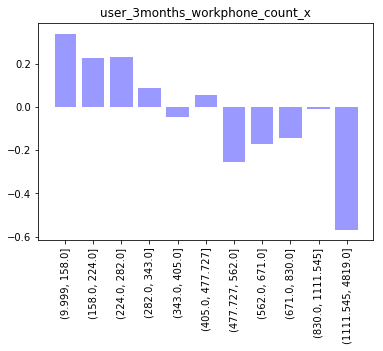

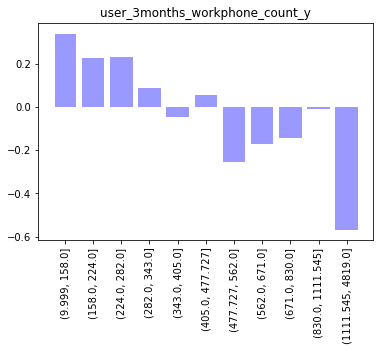

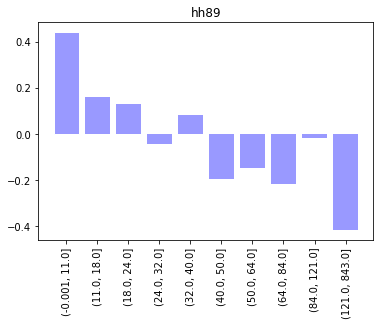

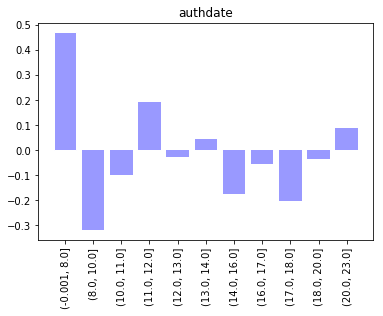

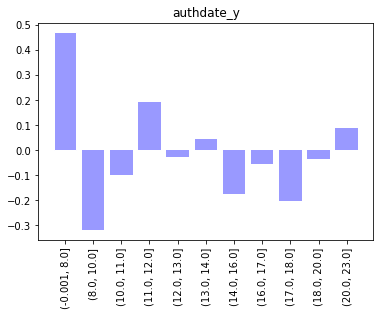

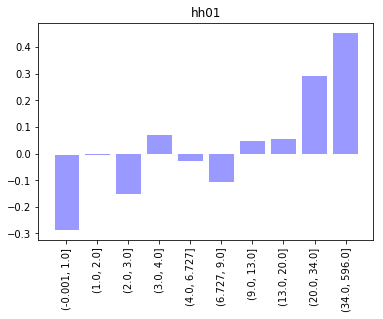

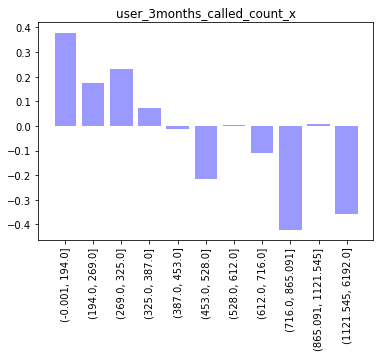

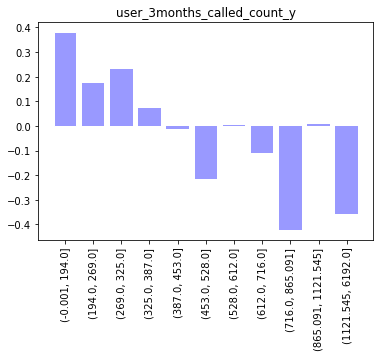

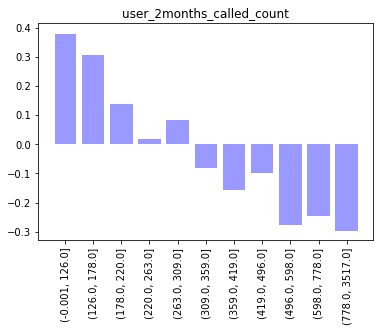

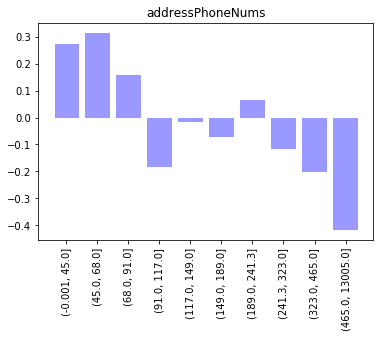

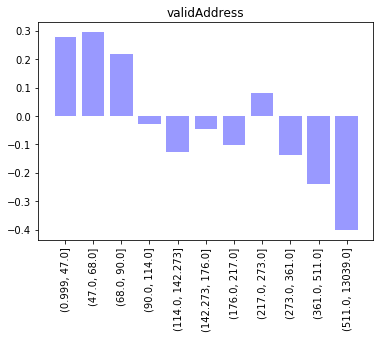

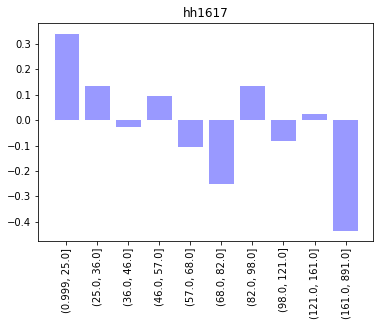

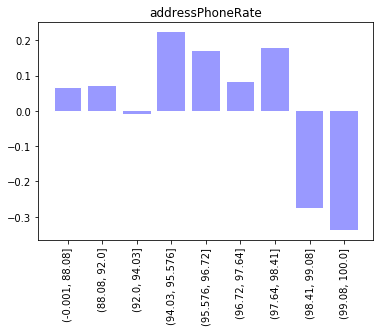

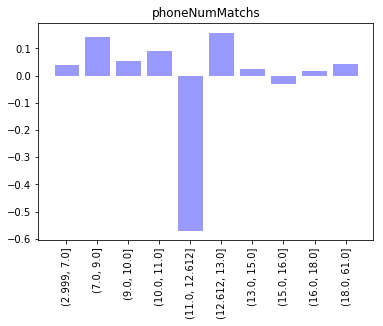

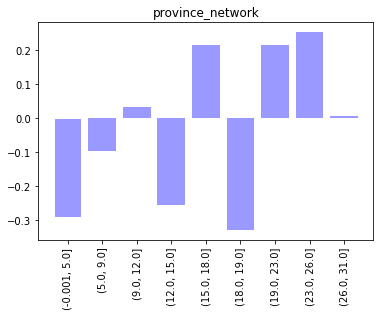

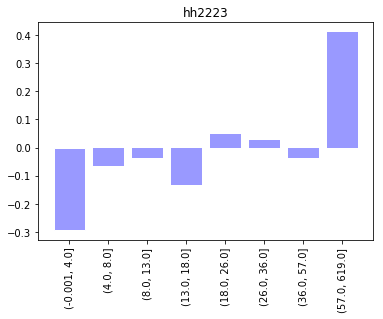

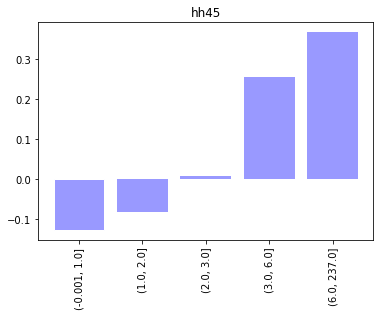

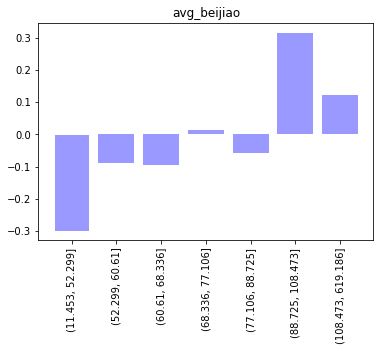

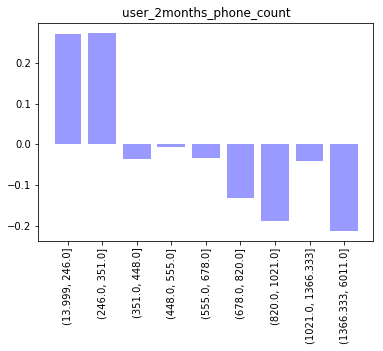

In [21]:
import matplotlib.pyplot as plt
i=1
for index, row in woeDataFrameSorted.iterrows():
    i+=1
    if(i>30):
        break
    X = pd.qcut(finalData[row["params"]],row["IV_cutN"],duplicates ='drop')
    fun =getIVandKS()
    fun.fit(X,finalData['y'])
    fun.result.sum()
    fun.plot_woe() 
    plt.title(row["params"])
    plt.show()

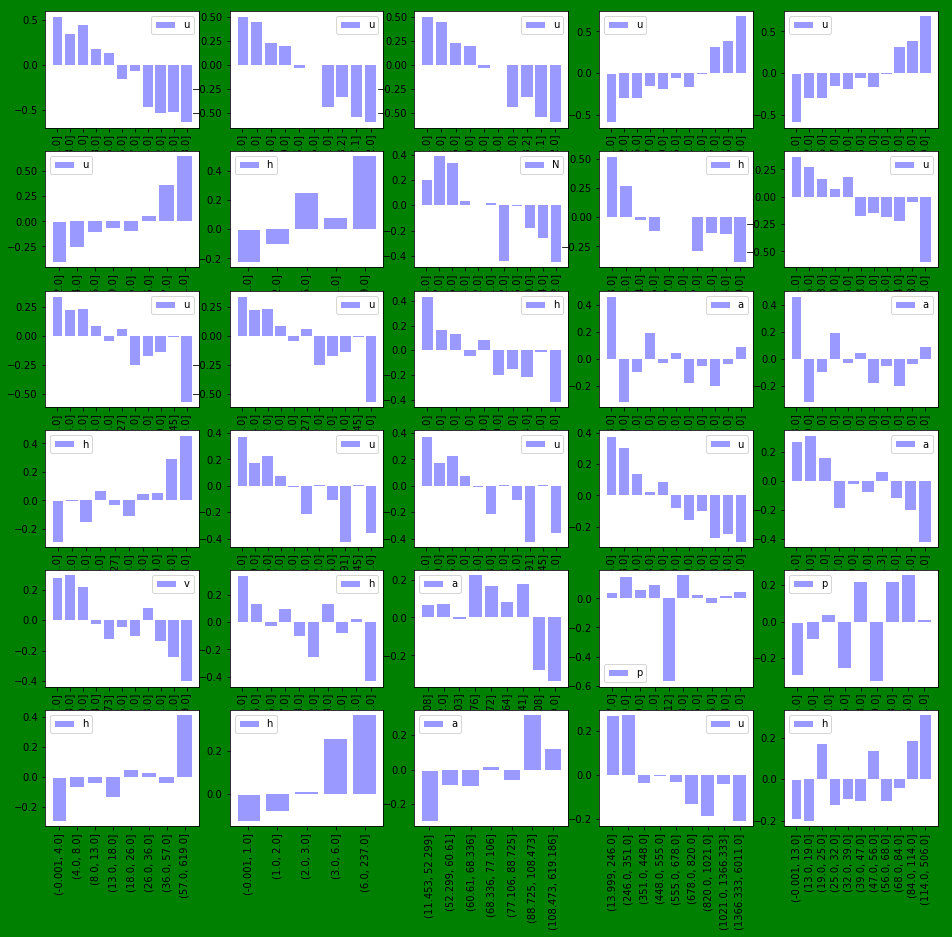

In [22]:
import matplotlib.pyplot as plt

fig, big_axes = plt.subplots(figsize=(16.0, 15.0) , nrows=6, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    

    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(0,0,0,0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

# for i in range(1,31):
#     ax = fig.add_subplot(6,5,i)
#     ax.set_title('Plot title ' + str(i))
i=0
for index, row in woeDataFrameSorted.iterrows():
    i+=1
    if(i>30):
        break
    X = pd.qcut(finalData[row["params"]],row["IV_cutN"],duplicates ='drop')
    fun =getIVandKS()
    fun.fit(X,finalData['y'])
    fun.result.sum()
    ax = fig.add_subplot(6,5,i)
    fun.plot_woe() 
    ax.legend(row["params"])
#     plt.title(row["params"])
# plt.show()

fig.set_facecolor('g')
plt.show()

### 从总览图中观察，如果是连续变量出现连续波动，在统计学中表面很可能是不合理特征。其中不合理woe值应该有phonenumbermatchs不合理。

#### 观察一下isInvited/uniformFlag/sex这三个特征的重要程度

In [23]:
from sklearn.ensemble import RandomForestRegressor
from pandas.core.frame import DataFrame
X_ranFor = finalData.drop(["y"],axis=1)
Y_ranFor = finalData["y"]
names = finalData.columns
rf = RandomForestRegressor()
rf.fit(X_ranFor,Y_ranFor)
fertures_impot =zip(map(lambda x:round(x,4),rf.feature_importances_),names)
print("Features sorted by Score:")
feture_data=[]
feture_name =[]
for i in sorted(fertures_impot):
    feture_data += [i[1]]
    feture_name += [i[0]]
dataF = {"name":feture_name,"data":feture_data}
DataFrame(dataF)

Features sorted by Score:


,data,name
0,uniformFlag,0.0014
1,familyNums,0.0017
2,sex,0.0019
3,isInvited,0.0026
4,user_3months_phone_count_x,0.0032
5,familyNumsRate,0.0044
6,user_3months_phone_time_y,0.0045
7,user_3months_phone_count_y,0.0057
8,user_3months_phone_time_x,0.0059
9,user_3months_call_count_x,0.0063


### 变量之间的相关性,先看其相关性程度高不高，再根据方程膨胀因子大小剔除一些相关性特别高的作为特征
### 在这之前做前三十的特征提取

In [24]:
trainFiaData = []
trainFiaData_column=[]
trainFiaData_cutN=[]
n=0
i_temp=1
for index, row in woeDataFrameSorted.iterrows():
    if(i_temp>30):
        break
    trainFiaData_column +=[row["params"]]
    if (i_temp!=20):
        trainFiaData_cutN +=[row["IV_cutN"]]
    i_temp +=1
trainFiaData_column.remove("phoneNumMatchs")
trainFiaData =finalData[trainFiaData_column]

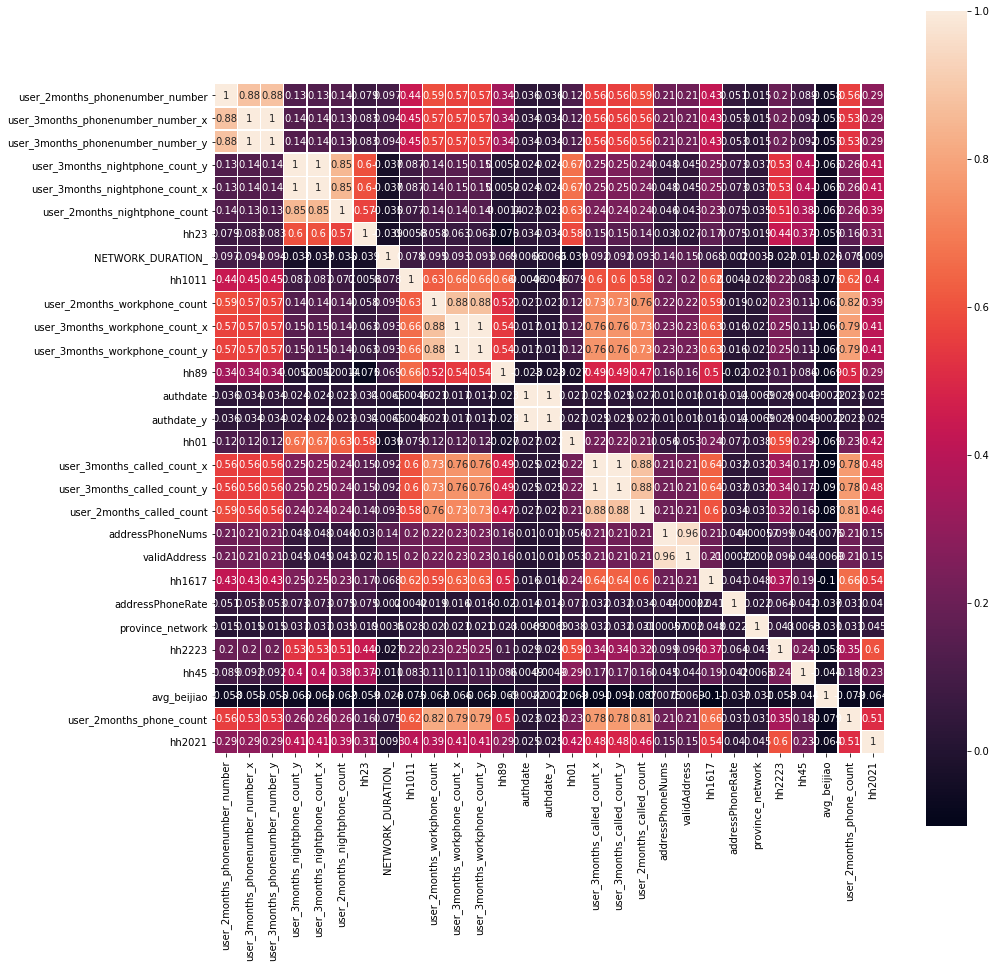

In [25]:
import seaborn as sns
f,ax = plt.subplots(figsize =(15,15))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(trainFiaData.corr(method="kendall"),square=True, linewidths=.3, annot=True)
plt.show()

### 方差膨胀因子 定义vif>10为相关很高 vif(0~10)不存在共线性，（10~100）存在较强的多重共线性，（>100）存在严重的共线性

In [26]:
# 求解各因变量VIF值
def _VIF(df,threhold=10):
    VIF=[]
    feature1=[]
    feature2=[]
    import statsmodels.api as sm
    feature_name=df.columns
    k=len(feature_name)
    for i in list(range(k)):
            Y=df[feature_name[i]]
            X=df.drop([feature_name[i]]+feature1,axis=1)
            X=sm.add_constant(X)
            model_ols=sm.OLS(Y,X)
            model_ols=model_ols.fit()
            R_2=model_ols.rsquared
            vif=1.0/(1-R_2)
            if vif>threhold:
                feature1=feature1+[feature_name[i]]
                VIF=VIF+[vif]
    return [feature1,VIF]

/Users/abeltowne/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


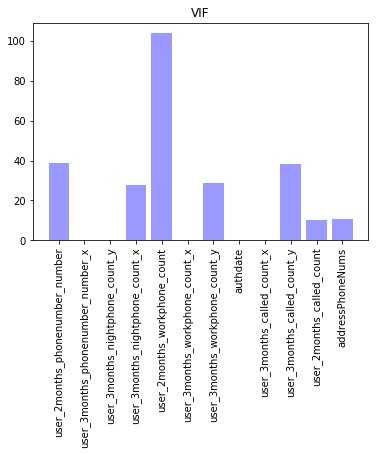

In [27]:
vifed = _VIF(trainFiaData,threhold=10)
n=len(vifed[0])
plt.bar(list(range(n)),np.array(vifed[1]),width=0.8,facecolor="#9999ff",edgecolor="white")
plt.xticks(list(range(n)),vifed[0],rotation=90)
plt.title("VIF")
plt.show()

In [28]:
#除去以下十二个特征
# user_2months_phonenumber_number',
#  u'user_3months_phonenumber_number_x',
#  u'user_3months_nightphone_count_y',
#  u'user_3months_nightphone_count_x',
#  u'user_2months_workphone_count',
#  u'user_3months_workphone_count_x',
#  u'user_3months_workphone_count_y',
#  u'authdate',
#  u'user_3months_called_count_x',
#  u'user_3months_called_count_y',
#  u'user_2months_called_count',
#  u'addressPhoneNums'
listRmoved = zip(trainFiaData_column,trainFiaData_cutN)
listRmoved.remove(("user_2months_phonenumber_number",11))
listRmoved.remove(("user_3months_phonenumber_number_x",10))
listRmoved.remove(("user_3months_nightphone_count_y",11))
listRmoved.remove(("user_3months_nightphone_count_x",11))
listRmoved.remove(("user_2months_workphone_count",11))
listRmoved.remove(("user_3months_workphone_count_x",11))

listRmoved.remove(("user_3months_workphone_count_y",11))
listRmoved.remove(("authdate",11))
listRmoved.remove(("user_3months_called_count_x",11))
listRmoved.remove(("user_3months_called_count_y",11))
listRmoved.remove(("user_2months_called_count",11))
listRmoved.remove(("addressPhoneNums",11))

new_trainFiaData_column=[]
new_trainFiaData_cutN=[]
for stri,datai in listRmoved:
    new_trainFiaData_column +=[stri]
    new_trainFiaData_cutN +=[datai]

### 接下来就是woe值替换样本值。因为去除一个phonenumbermatchs ，性别仅仅只有两个类别不需要woe替换。所以任然为17个特征,做评分卡一般选择小于20个特征。

In [29]:
new_trainFiaData = finalData[new_trainFiaData_column]
new_trainFiaData_copy =new_trainFiaData.copy()
adict=globals()
n=0
for i in new_trainFiaData.columns:
    new_trainFiaData_copy[i]=pd.qcut(new_trainFiaData[i],new_trainFiaData_cutN[n],duplicates ='drop')
    n+=1
for i in new_trainFiaData_copy.columns:
    funQ = getIVandKS()
    funQ.fit(new_trainFiaData_copy[i],finalData["y"])
    adict["woe%s" %i] = dict(zip(funQ.result.index,funQ.result["woe"]))
    new_trainFiaData_copy[i]=new_trainFiaData_copy[i].map(lambda x:adict["woe%s" % i][x])
new_trainFiaData_copy

,user_3months_phonenumber_number_y,user_2months_nightphone_count,hh23,NETWORK_DURATION_,hh1011,hh89,authdate_y,hh01,validAddress,hh1617,addressPhoneRate,province_network,hh2223,hh45,avg_beijiao,user_2months_phone_count,hh2021
0,-0.600479,-0.096650,-0.225142,-0.256051,-0.136345,-0.219371,-0.097467,0.068712,-0.158483,0.135085,-0.337485,0.034484,0.409594,-0.126277,-0.298228,-0.188451,0.307999
1,-0.600479,0.651010,0.080755,-0.178654,-0.384246,-0.016722,0.190985,0.454061,-0.158483,-0.435060,-0.009175,0.034484,0.409594,0.254557,-0.088850,-0.211852,0.307999
2,0.196782,-0.096650,0.080755,-0.442376,-0.292733,-0.148531,-0.176383,0.053569,-0.071428,-0.082593,0.168611,-0.096617,-0.037997,0.365990,-0.298228,-0.005697,-0.042543
3,-0.007613,-0.106038,0.252843,-0.178654,-0.292733,-0.148531,-0.029034,0.046784,0.070290,-0.082593,0.222239,-0.291317,-0.037997,-0.126277,0.121447,-0.188451,-0.042543
4,0.223864,-0.096650,0.080755,-0.442376,-0.292733,0.081476,0.190985,0.290438,-0.158483,-0.105270,-0.337485,-0.291317,-0.037997,-0.126277,0.315418,-0.005697,0.134905
5,0.438382,-0.096650,-0.225142,0.016887,-0.020292,0.081476,-0.097467,-0.006408,0.248983,-0.026930,-0.337485,0.008122,-0.066523,0.254557,-0.095063,0.272862,0.169152
6,-0.007613,0.053410,0.080755,-0.442376,-0.139599,-0.219371,-0.036763,0.290438,-0.098193,0.024242,0.071079,0.034484,0.409594,0.254557,0.012765,-0.040776,0.183839
7,0.438382,0.053410,-0.104693,-0.442376,-0.117479,0.160088,-0.176383,0.053569,0.248983,-0.026930,0.071079,-0.328274,-0.036774,-0.126277,0.012765,-0.036091,-0.194170
8,-0.439402,0.367413,0.080755,-0.442376,-0.292733,-0.016722,-0.318950,0.068712,0.070290,-0.105270,0.168611,0.034484,-0.292828,0.365990,-0.095063,-0.188451,0.169152
9,-0.439402,-0.405593,-0.225142,-0.442376,-0.000543,0.081476,-0.318950,-0.288065,-0.408818,-0.026930,-0.337485,0.034484,-0.036774,-0.126277,0.315418,-0.005697,-0.107778


## 下面开始跑LR模型

/Users/abeltowne/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


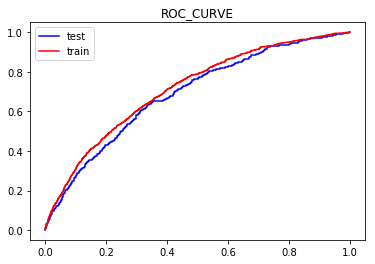

0.68813286170509014

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score,auc,roc_curve
x_train,x_test,y_train,y_test=train_test_split(new_trainFiaData_copy,finalData["y"],test_size=0.3)
LR_1=LogisticRegression(penalty="l2",dual=False,tol=1e-4,C=1,class_weight="balanced")
LR_1.fit(x_train,y_train)
# np.isnan(final_data).any()
#保存所建立的LR模型
from sklearn.externals import joblib
joblib.dump(LR_1, 'lr_1.model')
LR=joblib.load("lr_1.model")
##不断调整threhold的过程
fpr,tpr,threhold=roc_curve(y_test,LR_1.predict_proba(x_test)[:,1])
fpr1,tpr1,threhold1=roc_curve(y_train,LR_1.predict_proba(x_train)[:,1])
from matplotlib import pyplot as plt
plt.plot(fpr,tpr,color="blue")
plt.plot(fpr1,tpr1,color="red")
plt.title(u"ROC_CURVE")
plt.legend(["test","train"])
plt.show()
auc(fpr,tpr)

In [31]:
from sklearn import metrics
expected = y_train
predicted = LR_1.predict(x_train)
#fi-score是precision和recall的中和效果
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.95      0.65      0.77      8870
          1       0.17      0.65      0.26       944

avg / total       0.87      0.65      0.72      9814

[[5765 3105]
 [ 327  617]]


### 制作评分卡

In [32]:
#评分大致在600左右波动250以内
A=600
B=50
new_trainFiaData_copy_pingfen =new_trainFiaData_copy.copy()
woeData_2 = new_trainFiaData_copy_pingfen.copy()
#判断0为好用户的概率，这边1是自己关注的特征即坏用户
p = LR_1.predict_proba(woeData_2)[:,0]
new_trainFiaData_copy_pingfen['score'] = A+B*np.log(p/(1-p))
new_trainFiaData_copy_pingfen

,user_3months_phonenumber_number_y,user_2months_nightphone_count,hh23,NETWORK_DURATION_,hh1011,hh89,authdate_y,hh01,validAddress,hh1617,addressPhoneRate,province_network,hh2223,hh45,avg_beijiao,user_2months_phone_count,hh2021,score
0,-0.600479,-0.096650,-0.225142,-0.256051,-0.136345,-0.219371,-0.097467,0.068712,-0.158483,0.135085,-0.337485,0.034484,0.409594,-0.126277,-0.298228,-0.188451,0.307999,661.445848
1,-0.600479,0.651010,0.080755,-0.178654,-0.384246,-0.016722,0.190985,0.454061,-0.158483,-0.435060,-0.009175,0.034484,0.409594,0.254557,-0.088850,-0.211852,0.307999,612.175155
2,0.196782,-0.096650,0.080755,-0.442376,-0.292733,-0.148531,-0.176383,0.053569,-0.071428,-0.082593,0.168611,-0.096617,-0.037997,0.365990,-0.298228,-0.005697,-0.042543,633.806865
3,-0.007613,-0.106038,0.252843,-0.178654,-0.292733,-0.148531,-0.029034,0.046784,0.070290,-0.082593,0.222239,-0.291317,-0.037997,-0.126277,0.121447,-0.188451,-0.042543,610.347994
4,0.223864,-0.096650,0.080755,-0.442376,-0.292733,0.081476,0.190985,0.290438,-0.158483,-0.105270,-0.337485,-0.291317,-0.037997,-0.126277,0.315418,-0.005697,0.134905,626.916740
5,0.438382,-0.096650,-0.225142,0.016887,-0.020292,0.081476,-0.097467,-0.006408,0.248983,-0.026930,-0.337485,0.008122,-0.066523,0.254557,-0.095063,0.272862,0.169152,603.101756
6,-0.007613,0.053410,0.080755,-0.442376,-0.139599,-0.219371,-0.036763,0.290438,-0.098193,0.024242,0.071079,0.034484,0.409594,0.254557,0.012765,-0.040776,0.183839,596.580766
7,0.438382,0.053410,-0.104693,-0.442376,-0.117479,0.160088,-0.176383,0.053569,0.248983,-0.026930,0.071079,-0.328274,-0.036774,-0.126277,0.012765,-0.036091,-0.194170,618.825341
8,-0.439402,0.367413,0.080755,-0.442376,-0.292733,-0.016722,-0.318950,0.068712,0.070290,-0.105270,0.168611,0.034484,-0.292828,0.365990,-0.095063,-0.188451,0.169152,616.907135
9,-0.439402,-0.405593,-0.225142,-0.442376,-0.000543,0.081476,-0.318950,-0.288065,-0.408818,-0.026930,-0.337485,0.034484,-0.036774,-0.126277,0.315418,-0.005697,-0.107778,685.706389


### 观察测试机和训练集的评分的分布情况

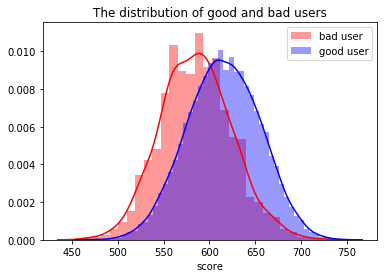

In [33]:
import seaborn 
seaborn.distplot(new_trainFiaData_copy_pingfen["score"][finalData["y"]==1],color="red")
seaborn.distplot(new_trainFiaData_copy_pingfen["score"][finalData["y"]==0],color="blue")
plt.legend(["bad user","good user"])
plt.title("The distribution of good and bad users")
plt.show()

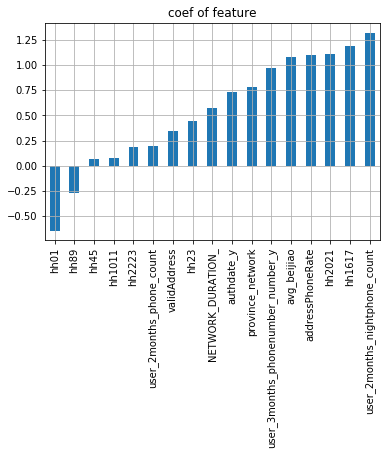

In [34]:
#pandas 绘图 只需要一个series就可以了.coef就是对应的特征的一次向系数，其值越大表面其作用越显著。
drop_score_pingfen =new_trainFiaData_copy_pingfen.drop(["score"],axis=1).copy()
coef=pd.Series(LR_1.coef_[0],index=drop_score_pingfen.columns).sort_values()
coef.plot(kind="bar",grid=True,title ='coef of feature')
plt.show()

### 计算KS值  KS是反应好坏用户预测能力的差值，这个值越大，越能反应预测好坏的能力

In [35]:
funT =getIVandKS()
# bins=[560,570,575.580,585,590,595,600,605,610,615,620,625,630,640]
bins2 = range(450,750,5)
print(bins2)
dengkuan_cut = pd.cut(new_trainFiaData_copy_pingfen['score'],bins2)
funT.fit(dengkuan_cut,finalData["y"])
funT.getKS()

[450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745]
              0   1       py1       py0       woe        IV   KS   cum_py1  \
score                                                                        
(450, 455]    0   0  0.000000  0.000000       NaN       NaN  0.0  0.000000   
(455, 460]    0   0  0.000000  0.000000       NaN       NaN  0.0  0.000000   
(460, 465]    0   1  0.000745  0.000000       inf       inf  0.0  0.000745   
(465, 470]    0   0  0.000000  0.000000       NaN       NaN  0.0  0.000745   
(470, 475]    1   1  0.000745  0.000079  2.244805  0.001494  0.0  0.001489   
(475, 480]    1   2  0.001489  0.000079  2.937952  0.004143  0.0  0.002978   
(480, 485]    2   0  0.000000  0.000158      -inf       inf  0.0  0.002978 

/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


### 画KS曲线

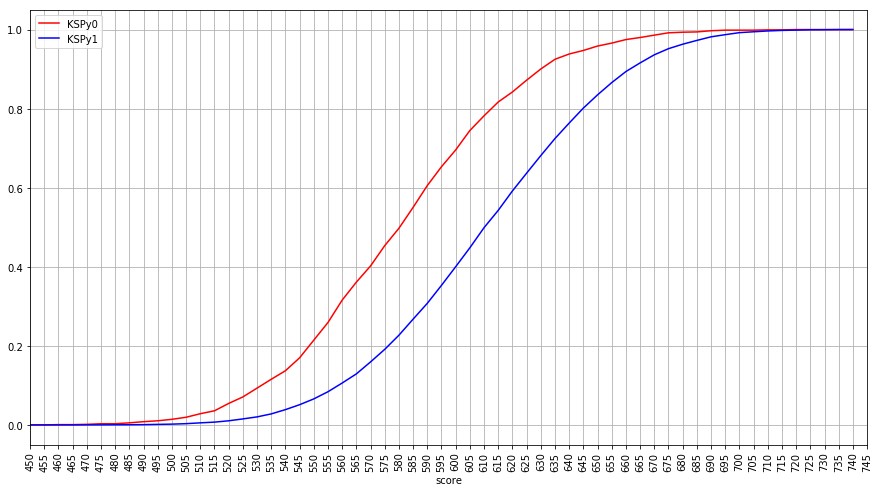

In [36]:
f,ax = plt.subplots(figsize =(15,8))
funT.KSPy1.plot(kind="line",color='red',grid =True,alpha=1)
funT.KSPy0.plot(kind="line",color='blue',grid =True,alpha=1)
plt.xticks(list(range(len(bins2))),bins2,rotation=90)
plt.legend(["KSPy0","KSPy1"])
plt.show()

### 查看详细参数，并解释为什么红色曲线在上，因为低分的时候，先出现坏用户占比高，先被发现。

In [37]:
funT.KS

,0,1,py1,py0,woe,IV,KS,cum_py1,cum_py0
score,,,,,,,,,
"(450, 455]",0,0,0.000000,0.000000,NaN,NaN,0.0,0.000000,0.000000
"(455, 460]",0,0,0.000000,0.000000,NaN,NaN,0.0,0.000000,0.000000
"(460, 465]",0,1,0.000745,0.000000,inf,inf,0.0,0.000745,0.000000
"(465, 470]",0,0,0.000000,0.000000,NaN,NaN,0.0,0.000745,0.000000
"(470, 475]",1,1,0.000745,0.000079,2.244805,0.001494,0.0,0.001489,0.000079
"(475, 480]",1,2,0.001489,0.000079,2.937952,0.004143,0.0,0.002978,0.000158
"(480, 485]",2,0,0.000000,0.000158,-inf,inf,0.0,0.002978,0.000316
"(485, 490]",1,3,0.002234,0.000079,3.343417,0.007205,0.0,0.005212,0.000394
"(490, 495]",4,4,0.002978,0.000316,2.244805,0.005978,0.0,0.008191,0.000710


### 找出差值最大的score区间

In [38]:
maxKsPart = funT.KSPy1 -funT.KSPy0
maxKsPart.sort_values(ascending =False)

score
(595, 600]    2.999863e-01
(590, 595]    2.978509e-01
(605, 610]    2.965896e-01
(600, 605]    2.953317e-01
(610, 615]    2.829362e-01
(585, 590]    2.827472e-01
(615, 620]    2.741489e-01
(580, 585]    2.705084e-01
(575, 580]    2.623138e-01
(620, 625]    2.503963e-01
(570, 575]    2.427286e-01
(625, 630]    2.352135e-01
(565, 570]    2.320690e-01
(630, 635]    2.190148e-01
(560, 565]    2.097628e-01
(635, 640]    2.004342e-01
(555, 560]    1.751832e-01
(640, 645]    1.747869e-01
(550, 555]    1.486516e-01
(645, 650]    1.457764e-01
(650, 655]    1.234964e-01
(545, 550]    1.186489e-01
(655, 660]    9.993892e-02
(540, 545]    9.835097e-02
(535, 540]    8.756535e-02
(660, 665]    8.086846e-02
(530, 535]    7.280067e-02
(665, 670]    6.422835e-02
(525, 530]    5.559042e-02
(670, 675]    4.975285e-02
(520, 525]    4.394254e-02
(675, 680]    4.016849e-02
(680, 685]    3.037653e-02
(515, 520]    2.871974e-02
(510, 515]    2.308817e-02
(685, 690]    2.149664e-02
(505, 510]    1.620407

## 主要考量auc和ks，一般auc在0.7,0.75,0.8，ks在0.3,0.35,0.4，判断模型为及格，良好，优秀。KS=0.3 auc=0.7 可以判断以上模型只能算及格

## 根据最大的KS分值区间，计算模型给A公司带来的利润提升比例

#### 根据KS值再结合成本数据可以暂定评分卡评分为595分